<a href="https://colab.research.google.com/github/BalajiGurusala/AI/blob/main/Neural_Networks_Assignment_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST dataset, simple fully connected neural network with 3 layers

Our objective is to set up a neural network problem using the MNIST dataset (https://www.tensorflow.org/datasets/catalog/mnist), which is commonly used for classifying handwritten digits. We'll implement a fully connected (FC) neural network and test three different combinations of activation functions, optimizers, regularizers, and loss functions.

Here's the plan for three different models:

Dataset MNIST provides input of size 28x28.

Let's use dense layers of size 128, 64 and 10 (3 layers) for all the 3 models.
1. Model 1: Basic Model
Activation Function: ReLU for hidden layers, Softmax for output
Optimizer: Stochastic Gradient Descent (SGD)
Regularizer: None
Loss Function: Categorical Crossentropy
2. Model 2: Intermediate Model
Activation Function: Leaky ReLU for hidden layers, Softmax for output
Optimizer: Adam
Regularizer: L2 regularization
Loss Function: Categorical Crossentropy
3. Model 3: Advanced Model
Activation Function: Swish for hidden layers, Softmax for output
Optimizer: Adam with learning rate decay
Regularizer: Dropout
Loss Function: Categorical Crossentropy

Steps:
Data Preparation: We'll load and preprocess the MNIST dataset.
Model Definition: Three models will be created with the configurations mentioned above.
Training: Train the models and track metrics like loss and accuracy.
Evaluation: Compare the performance of the three models

MNIST is a simple dataset. The expectation is that though all 3 models might produce a high accuracy, model 3 might perform better than model 2, and model 2 might perform better than model 1. (It need not be true all the time, due to the simple nature of this dataset)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
x_train.shape

(60000, 784)

#Model 1: Basic Model Activation Function: ReLU for hidden layers, Softmax for output Optimizer: Stochastic Gradient Descent (SGD) Regularizer: None Loss Function: Categorical Crossentropy

In [12]:
def create_model_1():
    model = Sequential([
        # INSERT LAYERS HERE BASED ON THE SPECIFICATIONS MENTIONED ABOVE
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    # Compile the model using the function model.compile using the optimizer mentioned above
    model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#Model 2: Intermediate Model
Activation Function: Leaky ReLU for hidden layers, Softmax for output
Optimizer: Adam
Regularizer: L2 regularization
Loss Function: Categorical Crossentropy

In [13]:
def create_model_2():
    model = Sequential([
        Dense(128, activation='leaky_relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)),
        Dense(64, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(10, activation='softmax'),
    ])
    # Compile the model using the function model.compile using the optimizer mentioned above
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model 3: Advanced Model
Activation Function: Swish for hidden layers, Softmax for output
Optimizer: Adam with learning rate decay
Regularizer: Dropout
Loss Function: Categorical Crossentropy

In [16]:
def create_model_3():
    model = Sequential([
        Dense(128, activation='swish', input_shape=(784,)), 
        Dropout(0.3),
        Dense(64, activation='swish'),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    # Compile the model using the function model.compile using the optimizer mentioned above
    adam = Adam(learning_rate=0.001, decay=1e-6)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model 1 (Basic Model):


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


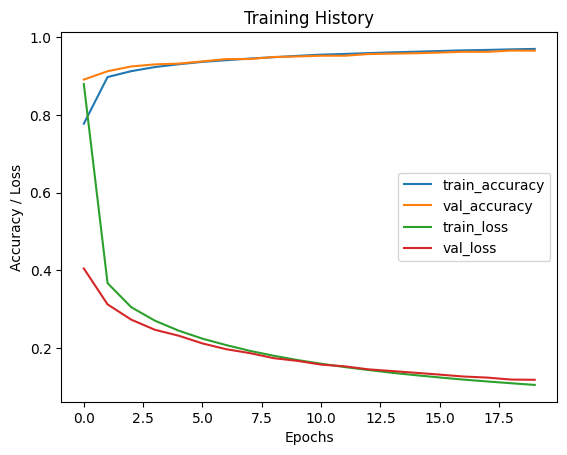

Test accuracy: 0.9655, Test loss: 0.1177

Model 2 (Intermediate Model):


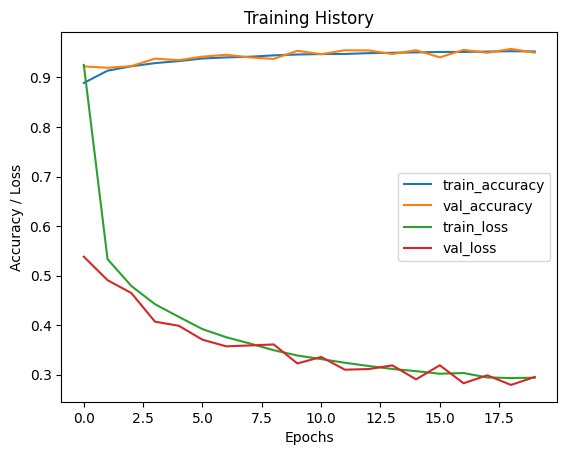

Test accuracy: 0.9498, Test loss: 0.2956

Model 3 (Advanced Model):


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


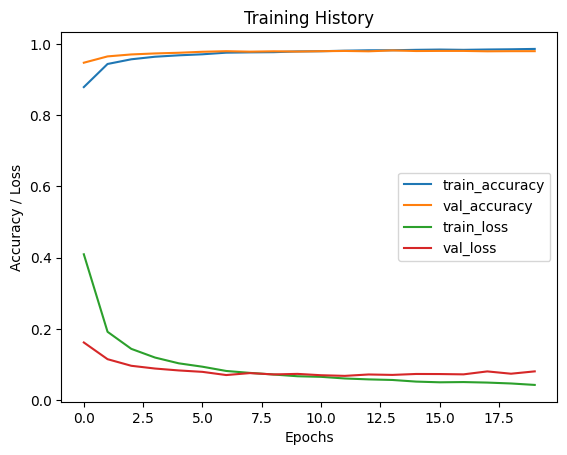

Test accuracy: 0.9794, Test loss: 0.0812


In [15]:
def train_and_plot(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=64):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)

    # Plot the accuracy and loss
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {accuracy:.4f}, Test loss: {loss:.4f}")

# Train and plot for all models
print("Model 1 (Basic Model):")
model_1 = create_model_1()
train_and_plot(model_1, x_train, y_train, x_test, y_test)

print("\nModel 2 (Intermediate Model):")
model_2 = create_model_2()
train_and_plot(model_2, x_train, y_train, x_test, y_test)

print("\nModel 3 (Advanced Model):")
model_3 = create_model_3()
train_and_plot(model_3, x_train, y_train, x_test, y_test)

# CIFAR-10 with similar network

Now let's look at a more complex dataset and let's see whether it can be addressed using the similar neural network(s).

CIFAR-10 consists of 60,000 color images in 10 classes, with 6,000 images per class. The CIFAR-10 dataset is a more challenging classification problem than MNIST due to the diversity and complexity of the images.

* When working with the MNIST dataset, the images are 28x28 grayscale images (i.e., single-channel). In a basic fully connected (FC) network, you flatten the 2D image (28x28) into a 1D vector of 784 elements before passing it to the dense layers.
* However, if we don't explicitly add the Flatten() layer in some frameworks (like TensorFlow), it may be inferred implicitly, especially for simple datasets like MNIST because the data is 2D (28x28). So, you might not have noticed the need for Flatten() in MNIST if it's handled automatically.



* In the case of CIFAR-10, the images are 32x32 with 3 color channels (RGB), meaning the shape of each image is (32, 32, 3). Before passing this 3D image to fully connected layers, you need to explicitly flatten the image into a 1D vector of 32*32*3 = 3,072 elements.

* If you don’t flatten the image in CIFAR-10, the fully connected layer won’t know how to process the multi-dimensional (3D) image data directly. Unlike in the MNIST case, it’s less likely that this will be inferred automatically.


So our first layer in this scenario can be tf.keras.layers.Flatten(input_shape=(32, 32, 3)). This can be followed by fully connected layers of size 512, 256 and 10 respectively

In this scenario too, create 3 models as per the configuration mentioned above and let's compare them

In [10]:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test)

#Model 1: Basic Model Activation Function: ReLU for hidden layers, Softmax for output Optimizer: Stochastic Gradient Descent (SGD) Regularizer: None Loss Function: Categorical Crossentropy

So our first layer in this scenario can be tf.keras.layers.Flatten(input_shape=(32, 32, 3)). This can be followed by fully connected layers of size 512, 256 and 10 respectively

In [13]:
def create_model_1():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    # Compile the model as per requirement mentioned above
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])   
    return model

#Model 2: Intermediate Model
Activation Function: Leaky ReLU for hidden layers, Softmax for output
Optimizer: Adam
Regularizer: L2 regularization
Loss Function: Categorical Crossentropy

In [16]:
def create_model_2():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(512, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(256, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    # Compile the model as per requirement mentioned above
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model 3: Advanced Model
Activation Function: Swish for hidden layers, Softmax for output
Optimizer: Adam with learning rate decay
Regularizer: Dropout
Loss Function: Categorical Crossentropy

In [18]:
def create_model_3():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(512, activation='swish', input_shape=(32*32*3,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='swish'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    # Compile the model as per requirement mentioned above
    adam = Adam(learning_rate=0.001, decay=1e-6)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model 1 (Basic Model):


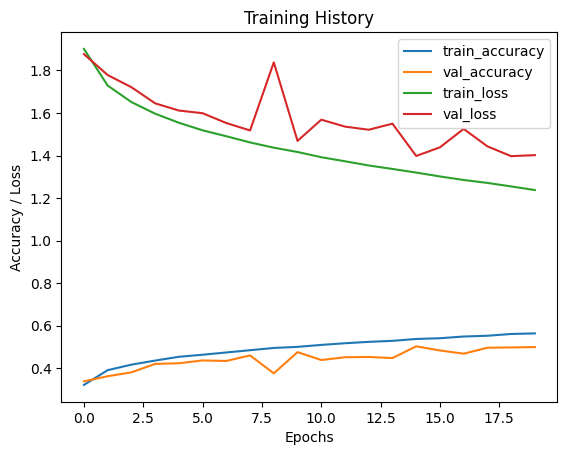

Test accuracy: 0.4999, Test loss: 1.4017

Model 2 (Intermediate Model):


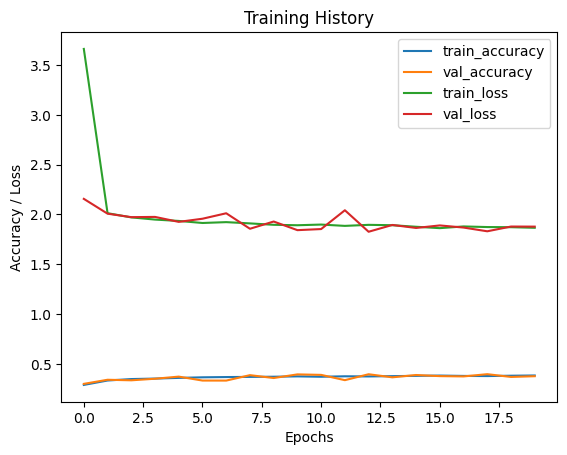

Test accuracy: 0.3758, Test loss: 1.8774

Model 3 (Advanced Model):


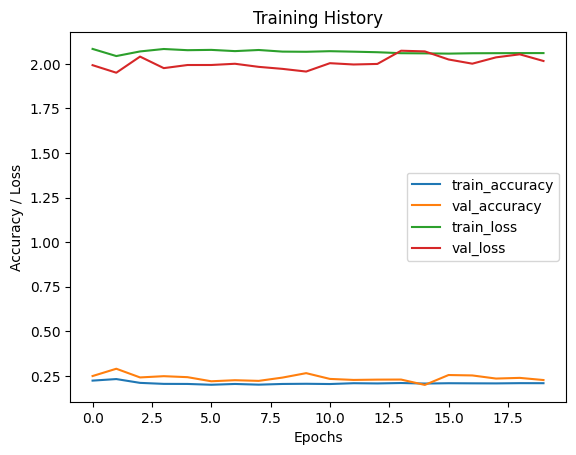

Test accuracy: 0.2270, Test loss: 2.0162


In [19]:
def train_and_plot(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=64):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)

    # Plot accuracy and loss
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {accuracy:.4f}, Test loss: {loss:.4f}")

# Train and plot for all models
print("Model 1 (Basic Model):")
model_1 = create_model_1()
train_and_plot(model_1, x_train, y_train, x_test, y_test)

print("\nModel 2 (Intermediate Model):")
model_2 = create_model_2()
train_and_plot(model_2, x_train, y_train, x_test, y_test)

print("\nModel 3 (Advanced Model):")
model_3 = create_model_3()
train_and_plot(model_3, x_train, y_train, x_test, y_test)

What is your observation here?

Was this the anticipated observation?

Try reading up a little and try to identify potential reasons as to why this behaviour was exhibited.

# MISCELLANEOUS:

## Can you implement a model which solves any issue(s) you encountered here?

Leverage Convolution Neural Networks to improve accuracy of above image data!